In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random as rd
from scipy.spatial.distance import cdist 
import sys
%matplotlib inline

# 1) K-MEANS

## a) Program from scratch the clustering algorithm k-means with random initialization.

In [2]:
class k_means:

    def __init__(self, N_c):
        
        self.N_centroids = N_c
        
    def initialization_of_centroids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[ sel ]
    
    def initialization_of_centroids_plusplus(self):    
        i=rd.randint(0,self.N_points-1)
        centroids=np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D=np.array([]) 
            D=np.append(D,np.min(cdist(self.data, centroids,'sqeuclidean'), axis=1))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            centroids=np.append(centroids,[self.data[i]],axis=0)
        return centroids
         
    
    def fit(self, data, init="random", N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0]
        
        if init=="k-means++":
            self.centroid_positions =  self.initialization_of_centroids_plusplus()
        else:    
            self.centroid_positions =  self.initialization_of_centroids_random()
            
        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
            dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
            self.labels = np.argmin(dist2_mat, axis = 1)
            loss = dist2_min.sum() 
            skip=False
            for i in range(self.N_centroids):
                if len(self.data[self.labels  == i ]) == 0:
                    skip = True
            if skip == True :
                self.centroid_positions = self.initialization_of_centroids_random()
                continue
            new_centers = np.array([self.data[self.labels  == i].mean(axis=0) for i in range(self.N_centroids)])
            if np.all(self.centroid_positions == new_centers):
                break
            self.centroid_positions = new_centers
        if cnt == N_max_iterations-1: 
            print("Max iterations reached")
        return loss, cnt 

       
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')
        
    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_centroids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_centroids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_centroids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_centroids * SSW/SSB    
     

## b) Download the data set S3 from http://cs.uef.fi/sipu/datasets/

18784625017596.504 21
CPU times: user 194 ms, sys: 6.53 ms, total: 201 ms
Wall time: 252 ms


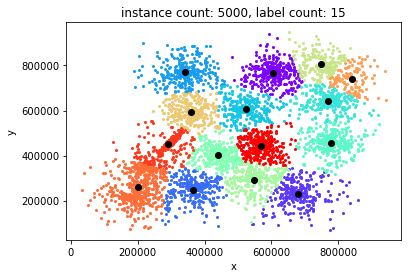

In [3]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
myk = k_means(15)
loss,iteration=myk.fit(data_points) 
myk.plot()
print(loss,iteration)

## c) Apply the algorithm with k=15 100 times, obtain the best value of the objective function and the average one. Plot the assignation for the best case.

0 20713273130464.008 22
1 18745057810461.1 34
2 18900356667843.457 24
3 21095213312555.46 31
4 20624411087908.43 55
5 18883907476918.812 47
6 18693949287922.758 23
7 20873835682356.6 42
8 22920492287658.773 22
9 18799343837837.926 21
10 21392841259725.156 34
11 18883708963463.555 33
12 21382475230278.836 36
13 18922998671670.387 23
14 21180780558141.176 26
15 18895143906488.824 21
16 19231463859024.312 13
17 20790447749472.062 34
18 19208816725557.375 42
19 19232168592676.117 20
20 18895285469672.598 20
21 18937558178879.5 24
22 20863224813766.117 33
23 19029169960618.273 31
24 20642548714494.54 24
25 21197444329401.215 30
26 16890511932312.121 39
27 18978083272154.27 11
28 19015477872481.6 24
29 18744866044168.08 30
30 20924058748035.71 34
31 18977152007244.39 18
32 19031983774453.797 44
33 18843936506023.22 12
34 20896019830524.094 19
35 21301520469504.5 33
36 18744801394414.656 20
37 18883471086514.953 25
38 18845172234078.586 23
39 21108720035057.266 32
40 19030174769479.574 52
41 

326 18800573211645.55 33
327 16890015480959.084 13
328 21387669542776.55 31
329 18598987818454.176 20
330 16890385632775.113 29
331 19202610001216.555 65
332 20970830837656.707 33
333 21353045917031.367 20
334 18655483076019.94 14
335 20665926878680.773 20
336 18811529162560.44 21
337 21000454550991.06 15
338 18804076462808.258 22
339 18786954537354.656 18
340 21100366006231.484 24
341 19120260300213.13 12
342 21230451674480.758 43
343 18866520524703.72 31
344 19030215748627.703 29
345 19030587985555.023 25
346 16890561579197.04 28
347 18936814388329.438 25
348 20948746374495.195 26
349 20890737041717.566 23
350 16889783535768.902 30
351 21060521481776.863 19
352 19169117229212.81 15
353 18810501489775.887 22
354 18891033609744.273 18
355 25447056588274.773 24
356 21474779087767.523 36
357 18891638882477.125 27
358 18805751360010.523 50
359 22794959655109.156 41
360 21386715763487.99 30
361 16889893299355.736 16
362 21370292295006.934 43
363 20576885216690.957 18
364 20614718299031.277

648 21042707628219.086 23
649 18979840229312.953 15
650 21386681847751.047 44
651 19262678625443.504 14
652 19257469320320.773 24
653 19119787735425.043 14
654 20891211226990.33 20
655 19122217692547.438 19
656 25085037956396.74 40
657 19201139681348.17 42
658 18662940235483.07 16
659 18883958541362.418 24
660 16889885631204.336 29
661 19211669234222.594 19
662 16889894827054.344 10
663 16890451395044.898 12
664 21403717582764.89 32
665 18664350944693.164 38
666 18802554370276.746 22
667 18720766829801.797 11
668 18693949287922.758 30
669 19121930143328.586 31
670 21386972687798.547 32
671 19199749568235.156 25
672 21016249844629.81 35
673 18956638444032.836 22
674 16889648383432.658 19
675 18865962231016.24 33
676 19225639953044.227 30
677 21281855339695.676 39
678 23007927931590.977 19
679 18863460545748.08 35
680 18786297232092.17 20
681 19340799933428.63 15
682 16890268772306.527 19
683 16890268184199.922 22
684 20733090356476.797 34
685 21485365752141.297 25
686 21055047429304.344

969 19012035684248.484 26
970 19200222093451.668 25
971 21095064442400.984 26
972 20782052205786.004 37
973 19030741002436.297 33
974 19309233137557.812 67
975 20577553624529.69 52
976 16890245422600.273 16
977 20836929147971.18 15
978 18670341382034.566 22
979 21185840525835.344 30
980 18932693109626.594 19
981 21100901939963.47 25
982 18834418626243.42 17
983 16890390085696.2 17
984 20641933965745.13 33
985 16890218564715.617 22
986 19083638097475.13 47
987 19122927332016.125 22
988 19209880379466.516 28
989 19211538371996.586 27
990 19239120568303.4 15
991 18897869237170.24 17
992 18883710090469.89 20
993 18879890496298.125 18
994 19236946833807.25 68
995 19258962937551.117 22
996 16890163030698.07 26
997 21035881927445.336 18
998 18799242836144.406 21
999 22973458939919.094 28
mean =  19542440148986.91
i_min =  764
min =  16889602517268.717
avg convengece =  27.171


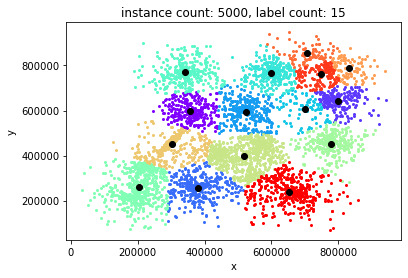

CPU times: user 1min 33s, sys: 2.71 s, total: 1min 36s
Wall time: 2min 10s


In [4]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myk = k_means(15)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myk.fit(data=data_points, init="random") 
    if loss < min_loss:
        min_loss=loss
        i_min=i
        min_myk = tmp_myk
    print(i, loss, iteration)    
    losses[i]=loss
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.95 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  27  \text{ iterations}$$

## d) Implement K-means ++ initialization in your algorithm and redo point c)

0 18710744880564.273 16
1 20768168495674.508 22
2 16890026988561.977 14
3 18895583909413.75 29
4 18856020119702.203 11
5 16889620022137.732 26
6 18648570378320.305 17
7 18580206991579.184 21
8 18800603607886.348 35
9 19209422973344.23 20
10 18693540126378.367 43
11 18805920315183.094 15
12 18911340543647.203 17
13 16890468899913.916 18
14 16890218564715.617 20
15 19006666584796.332 17
16 19214563880599.438 16
17 18924646381345.285 23
18 18882697011754.332 22
19 19241632061315.91 36
20 16889602517268.717 22
21 16889706192117.113 15
22 18864288456148.766 21
23 18857191294549.62 14
24 18993171268310.07 15
25 19241814589739.48 13
26 16889708041677.842 18
27 18977306691594.78 40
28 18987681359383.04 13
29 20724549168992.453 28
30 21072219249268.71 52
31 18945187382465.61 17
32 18901366493769.496 22
33 19181642765667.07 16
34 18787128153769.773 15
35 16889892358850.367 22
36 18883471086514.953 32
37 18802676756790.523 20
38 18815975859930.016 32
39 21007197344698.297 24
40 20726402117499.418

325 18849691644803.32 19
326 16889910876497.32 14
327 20815720201292.137 9
328 16890224321640.225 13
329 16890297655310.484 33
330 20702566707660.043 55
331 20622737385479.25 11
332 18743391683398.434 30
333 18952466676731.47 18
334 19029910161604.305 22
335 16889753405605.71 26
336 16890546389268.48 18
337 16889778789389.795 16
338 18890389679232.7 53
339 18653900124125.613 14
340 18656221299635.953 36
341 18895601668349.4 17
342 20684638605271.812 18
343 18743224047175.16 27
344 18919579998575.227 21
345 18819870712317.133 22
346 18745007226233.99 36
347 18800527151060.28 11
348 18710480560504.484 24
349 16890483687732.838 20
350 18822745644878.332 30
351 18864213865916.875 18
352 18980329817764.87 21
353 18877239746353.695 15
354 18800702118216.92 17
355 18900622865229.24 16
356 20637160336032.273 31
357 16890340829305.252 34
358 18852141643268.504 26
359 18959989416825.465 31
360 18822951056595.645 20
361 19231525467164.105 33
362 18893104584797.023 34
363 18693547180476.906 25
364

645 18804370389634.176 33
646 18978507655902.8 36
647 18804123067704.277 27
648 20603877102650.234 23
649 18599519939496.71 25
650 19361515449201.953 18
651 20708736194044.17 11
652 20881844528837.688 21
653 18684397440067.344 28
654 18579963911404.43 19
655 18988115346461.82 26
656 19242654301668.953 20
657 16890284706212.348 19
658 18887513209942.594 47
659 18987727949214.65 37
660 18895663249467.812 19
661 18803572082450.145 30
662 16889652086488.924 16
663 18728513016305.047 22
664 18987778100107.77 22
665 18946291709785.844 13
666 16889753363684.092 18
667 19200161488723.547 24
668 19096166900710.746 26
669 20969050485470.56 31
670 18710731342204.758 50
671 20722997365402.805 37
672 19021637255432.613 13
673 21206490762532.125 38
674 19220985107412.312 36
675 18815975859930.016 19
676 20707652716492.758 47
677 20883926540742.344 14
678 18890335264663.484 31
679 21121351510758.22 31
680 18802436306517.203 14
681 16890350734018.03 15
682 20633247094814.49 20
683 21277831747122.5 15


966 18786063749307.895 24
967 16889939907299.309 37
968 19209453171095.75 15
969 19221650025775.69 58
970 18890732015354.67 59
971 18890352769532.504 44
972 21051564095890.508 27
973 22741554160261.92 29
974 18784548578189.33 34
975 20994209942450.406 31
976 19123308661221.082 14
977 18694340967125.65 17
978 19006688515191.92 15
979 16889963685258.541 10
980 19021744710808.945 11
981 20705023054147.375 20
982 18911129519002.457 21
983 21244141272539.21 24
984 16890719389574.705 29
985 21178847309867.426 16
986 20675699226659.75 19
987 18803115810555.727 22
988 18682590625572.55 27
989 16889865913813.867 21
990 21002796290676.418 16
991 18962912330576.164 23
992 18799138010868.22 10
993 18804807138395.824 20
994 19231214412020.33 15
995 18804908459018.527 28
996 20951610333173.695 24
997 18711066405799.742 27
998 18883578079967.16 24
999 18812485270229.33 17
mean =  18996608691483.105
i_min =  415
min =  16889571849356.738
avg convengece =  23.274


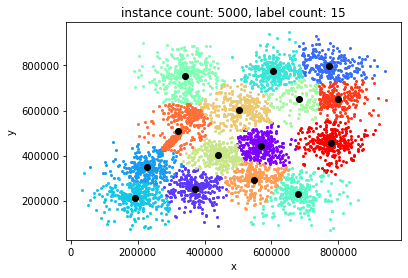

CPU times: user 1min 18s, sys: 2.29 s, total: 1min 21s
Wall time: 1min 39s


In [5]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myk = k_means(15)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myk.fit(data=data_points, init="k-means++") 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_myk = tmp_myk
    print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.89 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  23  \text{ iterations}$$

## e) Perform the scree plot (with k from 2 to 20) for this data set using the best value of the objective function.

2 210428334804957.56
3 139614749639647.7
4 91771622303874.1
5 75054113455106.05
6 61401881375290.59
7 50219979089862.6
8 42058237974477.24
9 36048589584476.06
10 30332860333232.836
11 27297227471792.527
12 24424251578312.555
13 21767408932818.42
14 19211219147564.633
15 16889670412403.617
16 16196920650142.727
17 15636546835915.924
18 15054219903893.684
19 14569807375478.771
20 14031892182671.348
CPU times: user 1min 35s, sys: 1.3 s, total: 1min 36s
Wall time: 1min 44s


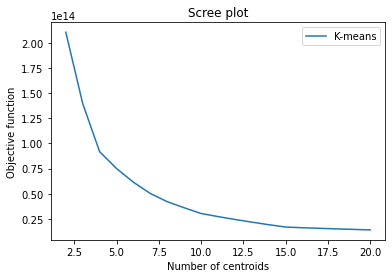

In [6]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_k=list()

for n_c in range(2,21):
    tmp_myk = k_means(n_c)
    min_loss = sys.maxsize
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration=tmp_myk.fit(data=data_points) 
        if loss<min_loss:
            min_loss=loss
            i_min=i
            min_myk = tmp_myk  
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_k.append([n_c,losses[i_min]])

res_k=np.array(res_k)
plt.plot(res_k[:,0], res_k[:,1], label="K-means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

# 2. FUZZY C-MEANS

## a) Modify k-means for obtaining c-means.

We use this relation:

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{|| x_i-c_j||}{||x_i-c_k||}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{\sqrt{ (x_i-c_j)^2 }}{\sqrt{(x_i-c_k)^2}}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{ (x_i-c_j)^2 }{(x_i-c_k)^2}\right)^{\frac{1}{m-1}} }$$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left((x_i-c_k)^2\right)^{\frac{1}{m-1}}   }{ \left((x_i-c_j)^2 \right)^{\frac{1}{m-1}}} $$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left(d^2_{ik}\right)^{\frac{1}{m-1}}   }{ \left(d^2_{ij} \right)^{\frac{1}{m-1}}} $$

$$ u_{ij}= \frac{  \tilde{u}_{ij}  }{  \sum_{k=1}^C \tilde{u}_{ik}  } $$

where

$$ \tilde{u}_{ij}  = \frac{1}{\left(d^2_{ij}\right)^{\frac{1}{m-1}} } $$

In [7]:
class fuzzy_c_means:

    def __init__(self, N_c, m=2):
        self.N_centroids = N_c
        self.m = m
        self.centroid_positions =np.empty((self.N_centroids,2))

    def fit(self,data, N_max_iterations=500, tol=1e-3):
        self.data = data
        self.N_points = np.shape(self.data)[0]
        self.u = np.empty((self.N_centroids,self.N_points))
        # Randomly initialize centers
        self.centroid_positions = self.data[np.random.choice(self.N_points, size=self.N_centroids, replace=False)]
    
        dist = np.fmax(
            cdist(self.centroid_positions, self.data, metric='sqeuclidean'), np.finfo(np.float64).eps)
        prev_u = np.ones((self.N_centroids,self.N_points))
        for iteration in range(N_max_iterations):     
            utilde = (1 / dist) ** (1 / (self.m-1))
            self.u  = (utilde / utilde.sum(axis=0))
            um=self.u **self.m
            denominator = np.reshape(um.sum(axis=1),(self.N_centroids,1))
            self.centroid_positions = um.dot(self.data)/denominator
            dist = cdist(self.centroid_positions, self.data, metric='sqeuclidean')
            dist2_min = np.array([np.min(dist,axis=0) ]) 
            self.labels = np.argmin(dist,axis=0)
            loss=dist2_min.sum() 
            if np.linalg.norm(prev_u-self.u )<tol: 
                break
            prev_u=self.u 
            
        return loss, iteration
    
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')



## b) Perform the scree plot for the same data set.

2 213560810223764.88
3 146155053638741.84
4 93722634427424.42
5 78198874530144.03
6 63888887087915.56
7 52167567438856.664
8 44796772047964.58
9 37850014823826.945
10 31328212318101.086
11 28053719220837.742
12 24964225218579.477
13 22374378853170.203
14 19591210358641.062
15 16941890549572.723
16 16316226762409.164
17 15797169252563.307
18 15322445011607.697
19 14860847591830.352
20 14463344325248.238
CPU times: user 9min 1s, sys: 12.9 s, total: 9min 14s
Wall time: 5min 48s


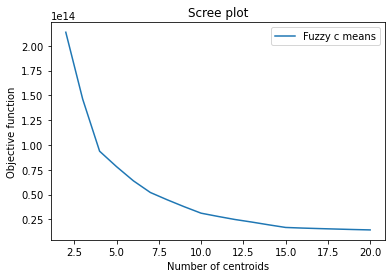

In [8]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_fuzzy=list()

for n_c in range(2,21):
    tmp_myfuz = fuzzy_c_means(n_c)
    min_loss= np.inf
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration =tmp_myfuz.fit(data=data_points) 
        if loss<min_loss:
            min_loss = loss
            i_min=i
            min_myfuz = tmp_myfuz  
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_fuzzy.append([n_c,losses[i_min]])

res_fuzzy=np.array(res_fuzzy)
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

## Scree plot comparison 

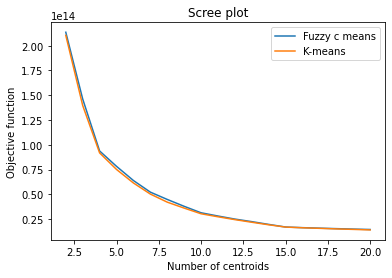

In [9]:
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.plot(res_k[:,0], res_k[:,1], label="K-means")

plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
#plt.yscale("log")
plt.legend()

## c) Plot the assignation for the best case.

0 19698837352953.246 52
1 19773615933970.734 154
2 19662531577722.562 69
3 16941898427301.861 26
4 19220252080214.008 178
5 19698766922273.32 79
6 19220249262413.805 161
7 19449950282343.547 46
8 16941911743086.174 45
9 16941910863736.55 33
10 16941910769003.875 81
11 19339538769632.293 75
12 19786096808574.97 68
13 19785673164720.418 149
14 20690848851585.824 49
15 16941908969620.178 32
16 21236578645430.98 158
17 19339520473089.08 65
18 19698770979067.117 90
19 19595038422315.773 70
20 19339575976491.492 93
21 16941896903939.414 39
22 16941900549440.637 44
23 19698768056807.133 71
24 19094184410304.434 52
25 16941897768806.791 31
26 16941910819012.8 84
27 19152567307985.85 87
28 19638420662926.39 121
29 16941903774284.855 55
30 16941909741237.416 227
31 21236581944746.64 60
32 19220244359783.9 44
33 19745211070728.992 44
34 19594636986313.78 79
35 23709786679830.992 233
36 16941897184321.518 33
37 22403109428624.926 177
38 19792845403414.434 63
39 19698838251624.562 52
40 19339577067

321 19773617418180.62 145
322 19785376144390.414 74
323 19785372166050.15 80
324 19698808911472.273 44
325 23710348827904.555 89
326 19785334083209.766 76
327 19220246617274.566 156
328 21297702854428.09 53
329 19323999746242.184 47
330 16941907585589.805 40
331 19594847163949.17 63
332 19785139806294.277 139
333 19594556924660.23 50
334 19698839279469.777 48
335 19745157591569.6 118
336 16941896604066.734 30
337 19662375565988.094 40
338 19220310663905.97 61
339 19079774325631.05 260
340 19445369974023.1 96
341 16941896711866.602 29
342 19785884925262.71 105
343 19445372914808.58 70
344 16941910281088.879 222
345 19323985656932.055 114
346 19339502657754.445 78
347 19662371369592.832 97
348 19785663628546.273 96
349 19785114298183.664 140
350 19662369595430.598 62
351 20609067187019.227 200
352 19792727098042.727 62
353 19785671929961.58 143
354 19339573081737.438 55
355 16941896575528.797 28
356 16941911523280.29 64
357 16941899084808.148 32
358 19220245951656.773 133
359 19339491464

638 19324020699754.72 184
639 19094186795595.875 67
640 20732097290149.65 201
641 19200456528296.453 379
642 16941903874801.531 25
643 19745205393574.21 87
644 21257928423272.37 144
645 19449954904922.598 72
646 19662532439876.562 75
647 19911934658427.03 88
648 19542037885110.465 51
649 16941908511048.125 30
650 23709794315056.633 109
651 19200456811441.746 362
652 19220248622726.633 55
653 21236587613518.72 71
654 16941911617618.578 30
655 19339569827568.6 67
656 19785775558566.727 90
657 19773615813151.15 134
658 19662532317111.547 153
659 16941907770560.932 91
660 16941900474793.006 24
661 16941902978532.3 37
662 16941909876832.738 24
663 16941907982188.941 71
664 16941899304102.549 37
665 19785920733509.742 71
666 19792845426313.22 74
667 16941898960928.375 38
668 19594864724529.17 53
669 19403900607995.6 95
670 16941901376221.537 85
671 19089054660255.062 86
672 16941900939023.39 21
673 19641051306873.52 103
674 16941907068233.004 93
675 19698770827259.08 103
676 19079774067419.7

956 19785984067812.48 114
957 19785130086401.82 156
958 19595176470995.395 79
959 16941908358121.842 33
960 19843259088587.164 116
961 19698840308623.4 57
962 19638745007277.227 90
963 19089062111370.516 60
964 19352399698202.055 83
965 19152566397102.668 165
966 19773614633891.227 105
967 19449949062436.484 49
968 23709801043790.82 353
969 19698839732189.5 70
970 16941897170626.746 28
971 19352453283991.46 52
972 16941900058014.35 62
973 19641141002501.938 157
974 19785923347936.21 72
975 16941902884676.967 47
976 16941909833520.506 150
977 19785122291506.348 193
978 21983005639162.43 71
979 19403900056936.508 97
980 19445233366501.55 63
981 19785662884589.438 148
982 16941914962403.834 28
983 16941907558680.383 83
984 19094198863977.31 53
985 19220248976102.83 164
986 19365499909361.543 62
987 16941895843711.84 27
988 19785665523402.62 113
989 19089054503638.32 71
990 21257860596247.22 52
991 19542005478695.473 96
992 19558514529494.02 86
993 19542126745116.562 107
994 19773621865387

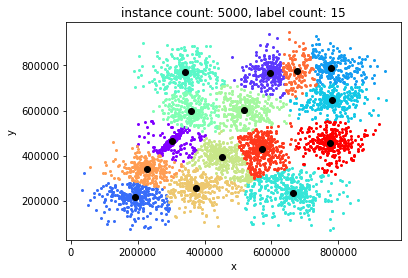

CPU times: user 4min 41s, sys: 6.49 s, total: 4min 47s
Wall time: 2min 41s


In [10]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myfuz = fuzzy_c_means(15)
min_loss=np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myfuz.fit(data_points) 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_myfuz = tmp_myfuz
    print(i,loss,iteration)
    losses[i]=loss
    iterations[i]=iteration
    
min_myfuz.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

## (Optional) modify your k-means code for obtaining k-medoids.

In [11]:
class k_medoids():
   
    def __init__(self, N_m=8):

        self.N_medoids = N_m
        
    def initialization_of_medoids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_medoids, replace=False)
        return sel
 
    def fit(self, data, N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0] 
        medoid_idxs = self.initialization_of_medoids_random()
        
        D_matrix = cdist(self.data, self.data,'sqeuclidean')

        for cnt in range(N_max_iterations):
            old_medoid_idxs = np.copy(medoid_idxs)
            labels = np.argmin(D_matrix[medoid_idxs, :], axis=0)
            self.update_medoids(D_matrix, labels, medoid_idxs)
            if np.all(old_medoid_idxs == medoid_idxs):
                break
                
        self.centroid_positions = self.data[medoid_idxs]
        self.labels = np.argmin(D_matrix[medoid_idxs, :], axis=0)
        dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
        dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
        loss = np.sum(dist2_min)
        
        return loss, cnt

    def update_medoids(self, D, labels, medoid_indexes):

        for k in range(self.N_medoids):
            cluster_k_indexes = np.where(labels == k)[0]
            if len(cluster_k_indexes) == 0:
                continue
            intra_cluster_distances = D[cluster_k_indexes, cluster_k_indexes[:, np.newaxis]]
            intra_cluster_all_costs = np.sum(intra_cluster_distances, axis=1)
            min_cost_index = np.argmin(intra_cluster_all_costs)
            min_cost = intra_cluster_all_costs[min_cost_index]
            curr_cost = intra_cluster_all_costs[np.argmax(cluster_k_indexes == medoid_indexes[k])]
            if min_cost < curr_cost:
                medoid_indexes[k] = cluster_k_indexes[min_cost_index]

    def plot(self):    
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_medoids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_medoids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')  

    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_medoids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_medoids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_medoids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_medoids * SSW/SSB    
      

0 21111880390006.0 6
1 18982480665522.0 13
2 18809882392377.0 10
3 19383548618132.0 14
4 18827328940325.0 11
5 21289039070581.0 10
6 20977926109020.0 6
7 21475068635466.0 15
8 19873569515509.0 13
9 20976415522088.0 9
10 21192353092254.0 14
11 23383417140706.0 7
12 21398905142143.0 11
13 20842405951105.0 17
14 18853073957871.0 10
15 18828676246895.0 8
16 18875384237446.0 8
17 19287821665051.0 11
18 25153557657560.0 6
19 20864950590173.0 12
20 19231374169176.0 8
21 18847883665284.0 12
22 19365921205727.0 15
23 23881673518625.0 7
24 18916877879076.0 8
25 25004791240129.0 17
26 19251975104779.0 11
27 18951932768702.0 11
28 18927801799463.0 10
29 18970035151647.0 20
30 16902628028072.0 12
31 19271719469394.0 15
32 18751969045879.0 8
33 20942242353175.0 13
34 18967718253612.0 16
35 21277776537287.0 8
36 19147582736260.0 11
37 19144779458864.0 8
38 19003648971765.0 10
39 19314438671505.0 12
40 18875229953364.0 7
41 19402578232553.0 18
42 19262451152048.0 11
43 20982310842914.0 14
44 214958283

350 20716428577106.0 9
351 21255013898295.0 11
352 18907858963961.0 12
353 18727388694748.0 9
354 19218272746668.0 18
355 18949995512841.0 12
356 19408945816674.0 12
357 18835056507628.0 7
358 25195257349362.0 12
359 18868445917639.0 19
360 19043419469559.0 11
361 19139416165124.0 6
362 18872644014397.0 10
363 19451455100602.0 15
364 18911171136546.0 5
365 19409778621813.0 10
366 21120385957176.0 8
367 18769995328312.0 9
368 20950420864399.0 9
369 23411298467728.0 10
370 25251464572667.0 7
371 22769512318060.0 10
372 19263000917013.0 6
373 21237415426712.0 12
374 21338318835304.0 9
375 19296927981718.0 14
376 21075402835515.0 10
377 20996383010715.0 16
378 21223534764011.0 17
379 16900868769920.0 12
380 23810532533499.0 10
381 21215971831004.0 11
382 21240504385024.0 13
383 21346404884614.0 12
384 21181235010501.0 14
385 19060921804598.0 11
386 23596951276194.0 12
387 18872984221266.0 13
388 19036697272635.0 9
389 27493648320128.0 9
390 16902991445515.0 9
391 20948052920331.0 13
392 19

696 21111011701920.0 7
697 19267383900497.0 6
698 18937028607125.0 13
699 18778707844069.0 17
700 21029455999586.0 6
701 19039013052286.0 9
702 21412922686032.0 16
703 23290576542296.0 10
704 18964166557316.0 17
705 19031495827331.0 9
706 18916554246262.0 10
707 19340498874189.0 12
708 22911731407734.0 16
709 19224641309471.0 19
710 25515558034032.0 7
711 18915799682566.0 9
712 31366378255026.0 13
713 20258139577418.0 8
714 19237130041127.0 17
715 18836839771654.0 16
716 23514725520836.0 8
717 21140619800432.0 7
718 20766557089663.0 17
719 20879905203827.0 16
720 21076452969475.0 9
721 21352122154952.0 14
722 18866308794441.0 18
723 19024915048876.0 9
724 27265909759947.0 15
725 21865947357626.0 13
726 21284842776893.0 13
727 25028249269131.0 9
728 18881345726692.0 9
729 21540892171735.0 9
730 19081617851851.0 9
731 18756853321449.0 12
732 22066951119786.0 13
733 19274331884602.0 17
734 21072874469534.0 16
735 20950212432625.0 10
736 18869980048707.0 13
737 19010760984718.0 22
738 2484

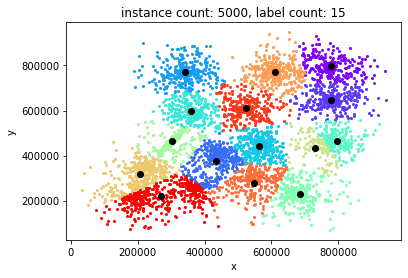

CPU times: user 8min 21s, sys: 1min 51s, total: 10min 13s
Wall time: 13min 58s


In [14]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_mymed = k_medoids(15)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_mymed.fit(data=data_points) 
    if loss < min_loss:
        min_loss = loss
        i_min=i
        min_mymed = tmp_mymed
    print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_mymed.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

In [13]:
print(min_mymed.F_ratio_index())

0.9655540562158983
